<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 1, semester 2</center>
<center>Author: Aline Lefebvre-Lepot</center>

# Rootfinding of equations in one variable

&nbsp;

<img src="./figures/Abstract.png" alt="Roots" style="width: 500px;"/>

&nbsp;

<div markdown=1 class=Abstract>
In this chapter, we consider the problem of finding **roots of an equation in one variable**: find $x$ such that $f(x)=0$. We discuss numerical methods to approximate solutions of this kind of problems to an arbitrarily high accuracy. First, we formalize the notion of convergence and order of convergence for **iterative methods**. Then, we focus on three iterative algorithms approximating roots of functions: **bisection method**, **fixed point iterations** and **Newton Raphson method**. These methods are described, analysed and used to solve 3 problems coming from physics, finance and dynamics of population.

## Table of contents

- [Introduction](#intro)
- [Iterative methods: errors and convergence](#iterative)
- [The bisection method](#bisection)
- [Fixed point iterations](#fixedPoint)
- [The Newton-Raphson method](#Newton)

In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

<a id="intro"></a>
## Introduction

Computing the zeros of a function $f$ or equivalently the roots of equation $f(x)=0$ is a problem that can be encountered in various situations. In lot of these situations, the solution cannot be computed exactly and one has to design numeriacl algorithms to approximate the solutions. We give below a few examples of such situations.

### Case study 1: State equation of a gaz

<img src="figures/VanDerWaals.jpg" alt="vanderWaals" style="width: 200px;"/>
  
>**Johannes Diderik van der Waals (1837-1923).**
>He is a Dutch theoretical physicist. He was primarily known for his thesis work (1873) in which he proposed a state equation for gases to take into account their non-ideality and the existence of intermolecular interactions. His new equation of state revolutionized the study of the behavior of gases. This work was followed by several other researches on molecules that has been fundamental for the development of molecular physics.

The state equation of a gaz relating the pressure $p$, the volume $V$ and the temperature $T$ proposed by van der Waals can be written

$$
\left[p + a \left( \frac{N}{V}\right)^2\right] (V-Nb) = kNT
$$

where $N$ is the number of molecules of the gaz, $k$ is the Boltzmann-constant and $a$ and $b$ are coefficients depending on the gaz. To determine the volume occupied by a gaz at pressure $p$ and temperature $T$, we need to solve this equation whose root is $V$. 

Suppose one want to find the volume occupied by $1000$ molecules of $\text{CO}_2$ at temperature $T=300\,K$ and pressure $p=3.5 \cdot 10^7 \,Pa$. Then, the previous equation has to be solved for $V$, with the following values of parameters $a$ and $b$ corresponding to carbon dioxide: $a=0.401 \,Pa\,m^6$ and $b=42.7 \cdot 10^{-6}\, m^3$. The Boltzmann constant is $k=1.3806503 \cdot 10^{-23} \,J\,K^{-1}$


### Case study 2: Investment found

Suppose someone wants to have a saving account valued at $S=30\,000$ euros upon retirement in 10 years. He can deposit $d=30$ euros each month on its account. The rate of interest is $i$ and $S_n$ the capital after $n$ months. If the intersest is computed monthly, we have:

$$
S_n =  \sum_{k=0}^{n-1} d(1+i)^{k} = d \frac{(1+i)^n-1}{i}
$$

If this person wants to know the minimal rate interest needed to achieve his goal, he has to solve the following equation for $i$:
$$
S =  d \frac{(1+i)^{n_{end}}-1}{i} \quad \text{ where } \quad n_{end} = 120
$$



### Case study 3: A first population model

<img src="figures/Malthus.jpg" alt="Malthus" style="width: 300px;"/>
  
>**Thomas Robert Malthus (1766-1834).**
>He is a British economist. He is mainly known for his works about the links between a population dynamics and its productions. He published  anonymously in 1798 an *Essay on the principle of populations*. It is based on the idea that the growth of a population is essentially geometric while the growth of the production is arithmetic. This lead to the so-called Malthusianism doctrine suggesting that the population size has to be controled to avoid a catastophe.

Population dynamics is a branch of mathematical biology that gave rise to a great amount of research and is still very active nowadays. The objective is to study the evolution of the size and composition of populations and how the environment drives them. The first model that can be derived is an natural exponential growth model. It depends on two parameters: $\beta$ and $\delta$, the average numbers of births and deaths per individual and unit of time. If we suppose that these parameters are the same for all individuals and do not depend on the size of the population, we can denote the growth rate of the population by $\lambda = \beta - \delta$  and write:

$$
\frac{dN}{dt} = \lambda \, N
$$

where $N$ is the population size. This model leads to exponentially increasing ($\lambda>0)$ or decreasing populations ($\lambda<0$). Of course, this model can be enriched to derive more realistic models such as the logistic population growth model where the growth rate $\lambda$ depends on the size of the population as follows : $\lambda(N) = \lambda_* - cN$. This way, too large populations have a negative growth rate, leading to population regulation. When the population is not isolated, one has to take into account immigration or emigration. If we denote by $r$ the average number of individuals joining the community per unit of time, a new model can be written as

$$
\frac{dN}{dt} = \lambda \, N + r,
$$

whose solution is (if $\lambda\neq 0$)

$$
N(t) = N(0)\exp(\lambda t) + \frac{r}{\lambda}(\exp(\lambda t)-1).
$$

If one wants to estimate the natural growth rate $\lambda$ in France, one can use the following (evaluated) data:

| Population 01/01/2016 | Population 01/01/2017   | migratory balance in 2016 |
|-----------------------|-------------------------|---------------------------|
|  66 695 000          | 66 954 000              |   67 000                     |

and solve the corresponding equation for $\lambda$ (unit of time = year)

$$
N(2017) = N(2016)\exp(\lambda) + \frac{r}{\lambda}(\exp(\lambda)-1).
$$



<a id="iterative"></a>
## Iterative methods: errors and convergence

All the previous problems have the same characteristic: the exact solution cannot be computed through an explicit formula and they have to be approximated through numerical methods.

Let us write these problems under the following generic rootfinding problem:

$$
\text{given }\quad f: [a,b] \to \mathbb{R},\quad \text{find}\quad x^*\in[a,b] \quad\text{such that}\quad f(x^*)=0.
$$

Methods for approximating the root $x^*$ of $f$ are often iterative: algorithms generate sequences $(x_k)_k$ that are supposed to converge to $x^*$. Given such a sequence, the two questions one has to answer are:
- Does the sequence converge to $x^*$ ?
- if it converges, how fast does it converge to $x^*$ ?

Before going further, we formalize bellow the notions of convergence and convergence speed.

<div  markdown=1 class="Def">
**Convergence**. Suppose that a sequence $(x_k)_k$ is generated to approximate $x^*$. The error at step $k$ is defined as

$$
e_k= |\,x_k\,-\,x^*\,|
$$

where $|\,\cdot\,|$ denotes the absolute value. The sequence $(x_k)_k$ is said to *converge to $x^*$* if

$$
e_k \longrightarrow 0 \quad \text{when}\quad k\to \infty
$$

Most of the time, several sequences can be generated and converge to $x$. One has to chose which one will be used by comparing their properties such as the computational time or the speed of convergence.

<div markdown=1 class="Ex">
Let us consider the three following sequences converging to $x^*=0$:

$$
x_k=\left(\frac{1}{2}\right)^k, \quad \bar x_k=\left(\frac{1}{7}\right)^k, \quad \text{and}\quad \hat x_k=\left(\frac{1}{2}\right)^{2^k}
$$

The values obtained for the first terms of these sequences are

|k  | 0   |1 |  2|  3|  4| 5|
|----|----|----|----|----|----|----|
| $x_k$ | 1     |      0.5 |  0.25 |  0.125 |  0.0625| 0.03125|
| $\bar x_k$ | 1     |      0.14285 |  0.02041 |  0.00291 |  4.164 e -4| 5.94 e -5|
| $\hat x_k$ |0.5 |   0.25 |   0.0625|   0.00390.. | 1.52 e -5 | 2.328 e -10|
  
The two sequences converges to zero but $\hat x_k$ seems to converge to zero faster that $\bar x_k$, itself converging faster than $x_k$.


A way to quantify the convergence speed of a sequence is to estimate its order of convergence:

<div  markdown=1 class="Def">
**Order of convergence**. Suppose that the sequence $(x_k)_k$ converges to $x^*$. It is said to converge to $x^*$ *with order $\alpha>1$* if

$$
\exists k_0>0, \quad \exists C>0, \quad \forall k\geq k_0, \quad \frac{e_{k+1}}{(e_k)^\alpha} \leq C.
$$

The convergence is said to be *linear* if $\alpha=1$ and *quadratic* if $\alpha=2$.

Of course,
- The bigger is $\alpha$, the better is the convergence: the number of exact digits is multiplied by $\alpha$ at each step.
- $\alpha$ being given, the smaller is $C$, the better is the convergence.

<div markdown=1 class="Ex">
Let us consider again the three following sequences converging to $x^*=0$:

$$
x_k=\left(\frac{1}{2}\right)^k, \quad \bar x_k=\left(\frac{1}{7}\right)^k, \quad \text{and}\quad \hat x_k=\left(\frac{1}{2}\right)^{2^k}
$$

We have

$$\frac{e_{k+1}}{e_k} = \frac{1}{2}, \quad \frac{\bar e_{k+1}}{\bar e_k} = \frac{1}{7} \quad \text{ and }\quad \frac{\hat e_{k+1}}{(\hat e_k)^2} = 1 $$

Then, $x_k$ and $\bar x_k$ converge to $x^*$ with order one while $\hat x_k$ converges to $x^*$ with order two. This confirms the previous observations: 

- $\hat x_k$ converges faster that $x_k$ and $\bar x_k$ to zero since it has a higher order of convergence.
- $\bar x_k$ converges faster that $x_k$ since it has the same order of convergence but a smaller constant.
- the number of exact digits of $\hat x_k$ doubles at each step.


### Graphical study of convergence

The convergence of a sequence can be observed plotting $e_k$ versus $k$.

Then, remarking that, for a method of order $\alpha$, one have

$$
\log e_{k+1} \leq \alpha \log e_k + \log C.
$$

a graphical method to observe the convergence rate is to plot $\log e_{k+1}$ versus $\log e_k$. 

In the following code, we plot $e_k$ versus $k$ and $\log e_{k+1}$ versus $\log e_k$ for the three considered sequences.

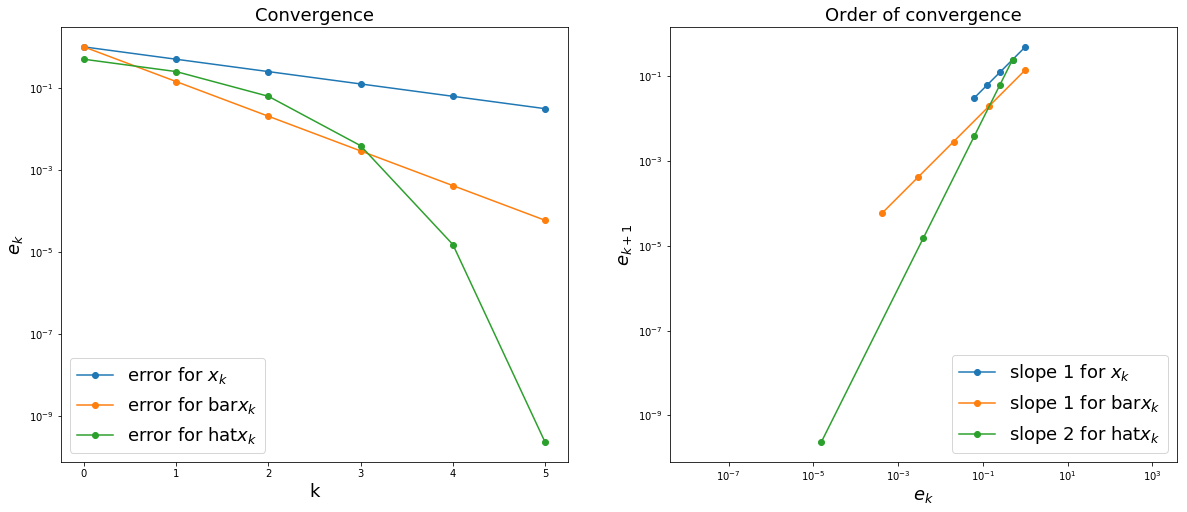

In [2]:
N = np.arange(0,6,1)
x1 = (1./2) ** N 
x2 = (1./7) ** N
x3 = (1./2) ** (2**N)

fig = plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.plot(N, x1, marker="o", label='error for $x_k$')
plt.plot(N, x2, marker="o", label='error for bar$x_k$')
plt.plot(N, x3, marker="o", label='error for hat$x_k$')
plt.legend(loc='lower left', fontsize=18)
plt.xlabel('k', fontsize=18)
plt.ylabel('$e_{k}$', fontsize=18)
plt.yscale('log')        # log scale for the error
plt.title('Convergence', fontsize=18)

plt.subplot(122)
plt.loglog(x1[:-1:], x1[1:], marker="o", label='slope 1 for $x_k$') #log-log scale
plt.loglog(x2[:-1:], x2[1:], marker="o", label='slope 1 for bar$x_k$') #log-log scale
plt.loglog(x3[:-1:], x3[1:], marker="o", label='slope 2 for hat$x_k$') #log-log scale
plt.legend(loc='lower right', fontsize=18)
plt.axis('equal')
plt.xlabel('$e_k$', fontsize=18)
plt.ylabel('$e_{k+1}$', fontsize=18)
plt.title('Order of convergence', fontsize=18)

plt.show()

On the second plot, we can observe the order of convergence of each method which is given by the slope of the lines. The first plot confirms that $e_k$ and $\bar e_k$ are linear versus $k$, with solpe $\log(1/2)$ and $\log(1/7)$ respectively.

To finish, notice that, most of the time, since $x$ is not known, we cannot compute the value of the true error at step $k$. Instead try to find a (calculable) bound for the error, which gives us a “worst-case” error:

<div  markdown=1 class="Def">
**Error estimator**. Suppose that a sequence $(x_k)_k$ is generated to approximate $x^*$. The sequence $(\beta_k)_k$ is an error estimator if

- $\beta_k>0$ is computable
- $\beta_k$ is a bound for the error: $\, e_k < \beta_k$ for all $k$

In that case, if the estimator $\beta_k \rightarrow 0$ when $k\to \infty$, we obtain that

- the sequence $x_k$ converges to $x^*$
- the error goes to zero at least as fast as the sequence $\beta_k$.

One has to take care that an estimator only provides a bound on the error. As a consequence, the error can go to zero faster than the estimator.


<a id="bisection"></a>
## The bisection method

The first method to approximate the solution to $f(x)=0$ is based on the Intermediate Value Theorem (see Appendix). Suppose $f$ is a continuous function on the interval $[a,b]$ where $f(a)$ and $f(b)$ have opposit signs: $f(a)\,f(b)<0$. Then, there exists $x^*$ in $]a,b[$ such that $f(x^*)=0$.

Starting from an intervall $I_0=[a_0,b_0]$ such that $f(a_0)\,f(b_0)<0$. Let $x_0$ be the midpoint of $I_0$:

$$
x_0 = \frac{a_0+b_0}{2}.
$$

Then, the bisection method iterates by chosing $I_1=[a_1,b_1]$ and $x_1$ as follows:

- if $f(x_0)=0$ then $x_0=0$ and the algorithm terminates
- if $f(a_0)\,f(x_0)<0$ then there exists a zero of $f$ in $[a_0,x_0]$: set 

$$
a_1=a_0,\quad b_1=x_0 \quad \text{and}\quad x_1 = \frac{a_1+b_1}{2}
$$

- if $f(x_0)\,f(b_0)<0$ then there exists a zero of $f$ in $[x_0,b_0]$: set 

$$
a_1=x_0,\quad b_1=b_0 \quad \text{and}\quad x_1 = \frac{a_1+b_1}{2}
$$

The method iterates until a stopping criterion that will be discussed later.

An example of the first two iterations is illustrated on an example in the figure bellow.

<img src="figures/Bisection.png" alt="Bisection" style="width: 500px;" />

The bisection method leads to the following algorithm:

<div  markdown=1 class="Algo">
**Bisection method.** Computes a sequence $(x_k)_k$, approximating $x^*$ solution to $f(x^*)=0$.


\begin{align}
INPUT:&\quad f, a, b\\
DO:&\quad x = (a+b)/2\\
&\quad \text{While stopping criterion is not achieved do}\\
&\quad\quad\quad \text{If } \quad f(a)\,f(x)<0 , \quad b=x \quad\text{ else }\quad a=x\\
&\quad\quad\quad x = (a+b)/2\\
&\quad \text{end while}\\
RETURN:&\quad x\\
\end{align}

In the following, we implement the bisection method and test it to approximate $x^*$, the unique solution in $\mathbb R$ to $f(x) = x^3-2=0$. In this first version, the stopping criterion is: stop if the requested number of iteration is achieved or if the zero was found. 

In [85]:
## Function f: x -> x^3 -2

def ftest(x):
    return x**3 - 2

In [42]:
## Bisection algorithm for function f
## input : f = name of the function
##         a, b = initial intervall I_0 with f(a)f(b)<0
##         K = number of iterations
## output : x = sequence approximating the zero of f

def Bisection(f,a,b,K):
    # create vector x
    x = np.zeros(K+1)
    k = 0
    x[0] = (a+b)/2  # sets x_0 = (a+b)/2
    # computation of x_k
    # stops if the root is found or if the number of iterations is achieved
    while f(x[k]) != 0 and k < K:
        if f(a)*f(x[k]) < 0:
            b = x[k]
        else:
            a = x[k]
        k = k+1
        x[k] = (a+b)/2
    return x

xstar = 1.2599210498948732
x = [ 1.5         1.25        1.375       1.3125      1.28125     1.265625
  1.2578125   1.26171875  1.25976562  1.26074219  1.26025391  1.26000977
  1.2598877   1.25994873  1.25991821  1.25993347  1.25992584  1.25992203
  1.25992012  1.25992107  1.2599206 ]


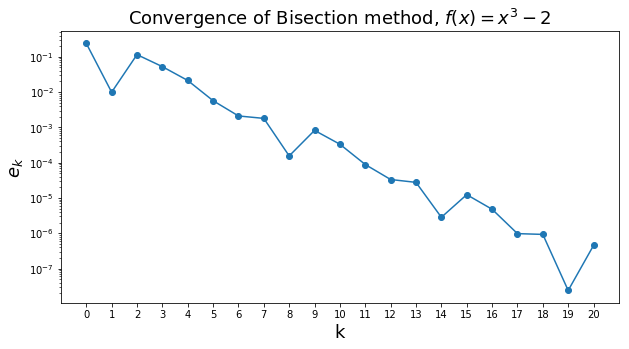

In [87]:
## Test on I = [1,2] containing x^*
a = 1 
b = 2
N = 20
xstar = 2**(1.0/3)

x=Bisection(ftest,a,b,N)
print('xstar =',xstar)
print('x =',x)
K = np.arange(0,N+1,1)
err = abs(x-xstar)

fig = plt.figure(figsize=(10, 5))
plt.plot(K, err, marker="o")
plt.xticks(np.arange(0,N+1,1))
plt.xlabel('k', fontsize=18)
plt.ylabel('$e_{k}$', fontsize=18)
plt.yscale('log')        # log scale for the error
plt.title('Convergence of Bisection method, $f(x)=x^3-2$', fontsize=18)
plt.show()

We observe that the convergence to zero for the bisection method is not monotone. For example, $x_8$ is closer to $x$ than $x_9$ ou $x_{10}$.

### Error estimator and stopping criterion

In the previous example, the stopping criterion is simply based on the number of iterations the user wants to achieve. However, when one wants to approximate $x^*$, one has in mind the maximal error allowed and therefore, fixing the number of iterations have no sense as a stopping criterion. A criterion based on the error at the current step would be much more meaningfull.

Suppose that a parameter $\epsilon$ is given, fixing the precision needed. We give bellow three classical stopping criteria:

 $\quad\quad\quad\quad$ 1. $\quad|\,x_k-x_{k-1}\,| \, <\, \epsilon\quad\quad$ 2. $\quad |\,f(x_k)\,|\,<\,\epsilon\quad\quad$ 3.$\quad\displaystyle \frac{|\,x_k-x_{k-1}\,|}{|\,x_k\,|}\, <\, \epsilon$

Unfortunately, each of these criteria can induce difficulties. For example, criterion 1 can be fullfilled even for non-converging sequences (think e.g. at $x_k=\sum_{j=1}^k \frac{1}{j}$). Criterion 2 is also non-relevant for some functions $f$ for which $f(x)$ can be close to zero while $x$ is still far from $x^*$. Without any further information on $f$ or on the convergence of the sequence, one should make criterion 3 its first choice.

In order to use a more precise stopping criterion, related to the true error, one should know more about the way the sequence converges to $x$. To do so, error estimators are very usefull. Concerning the bisection method we have the following result:

<div  markdown=1 class="Prop"> 
** Convergence of the bisection method.** Let $f$ be a continuous function on $[a,b]$ with $f(a)\,f(b)<0$. Suppose $(x_k)_k$ is the sequence generated by the bisection method to approximate $x^*$, solution to $f(x)=0$ on $[a,b]$.

Then, the sequence $(x_k)_k$ converges to $x^*$ and the following estimation holds:

$$
\forall k\geq 0,\quad |x_k-x^*|\,\leq\,\frac{b-a}{2^k}.
$$

> **Proof.** Since the interval is divided by 2 at each step of the method, we have
>
>$$
\forall k\geq 0\quad |b_k-a_k|\leq \frac{b-a}{2^k}
$$
>
> Remarking that both $x^*$ and $x_k$ are in $I_k=[a_k,b_k]$, we obtain
>
>$$
\forall k\geq 0\quad |x_k-x^*|\leq \frac{b-a}{2^k}
$$
>
> This proves the convergence of $x_k$ to $x^*$ and provides the requested estimation.

<div  markdown=1 class="Rmk"> The bisection method is said to be *globally convergent*. Indeed, the initialization of $a$ and $b$ do not need to be close $x$. Whatever the choice for these parameters, the generated sequence will converge to $x$, provided that $f(a)\,f(b)<0$.

This proposition provides a new stopping criterion: if one wants the error to be less than $\epsilon$, one should stop at iteration $k$ such that 

$$\frac{b-a}{2^k}\leq \epsilon.$$

We rewrite the code for the bisection method using this criterion. Note that we still ask for a maximal number of iterations in order to avoid infinite loops in case the convergence of the method is too slow to lead to the requested precision in a reasonnable time.

In [3]:
## Bisection algorithm for function f
## input : f = name of the function
##         a0, b0 = initial intervall I_0 with f(a0)f(b0)<0
##         eps  = tolerance
##         Kmax = maximal number of iterations allowed
## output : x = sequence approximating the zero of f

def Bisection2(f,a0,b0,eps,Kmax):
    # create vector x
    x = np.zeros(Kmax+1)
    k = 0
    a = a0
    b = b0
    x[0] = (a+b)/2  # sets x_0 = (a+b)/2
    # computation of x_k
    while (b0-a0)/(2**k) >= eps and k < Kmax:
        if f(a)*f(x[k]) < 0:
            b = x[k]
        else:
            a = x[k]
        k = k+1
        x[k] = (a+b)/2
    return (x, k)

precision: eps = 0.001
number of iterations = 10


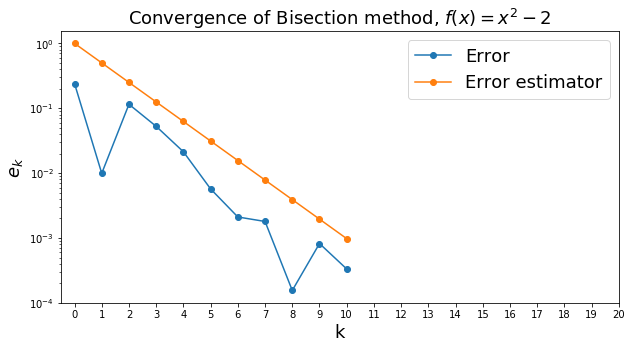

In [44]:
## Test
a = 1
b = 2
eps=1.0e-3
Kmax = 20
xstar = 2**(1.0/3)

res=Bisection2(ftest,a,b,eps,Kmax)
kend=res[1]
x = res[0][:kend+1:]
print('precision: eps =',eps)
print('number of iterations =',kend)

K = np.arange(0,kend+1,1)
err = abs(x-xstar)
errEstim = (b-a) / (2**K) 
fig = plt.figure(figsize=(10, 5))
plt.plot(K, err, marker="o", label="Error")
plt.plot(K, errEstim, marker="o", label="Error estimator")
plt.legend(loc='upper right', fontsize=18)
plt.xticks(np.arange(0,N+1,1))
plt.xlabel('k', fontsize=18)
plt.ylabel('$e_{k}$', fontsize=18)
plt.yscale('log')        # log scale for the error
plt.title('Convergence of Bisection method, $f(x)=x^2-2$', fontsize=18)
plt.show()

Since the estimator is an upper bound for the true error, the condition imposing that it has to be bellow the requested precision is a sufficient condition but not a necessary one. 

Here, for $\epsilon=10^{-3}$, due to the non monotone convergence of the method, the estimator makes the computation terminate for $k=10$. However, $x_8$ was yet sufficiently precise and, when the stopping criterion is reached, the precision is much better than needed. 

However, such an estimator makes the user sure to obtain the requested precision. 

### Case study 1: State equation of a gaz, a solution using bisection

We use the bisection method to solve case study 1 and compute the volume of $1000$ molecules of $\text{CO}_2$ at temperature $T=300\,K$ and pressure $p=3.5 \cdot 10^7 \,Pa$. We want to compute the corresponding volume with tolerance $10^{-12}$. 

To do so, we have to solve the following equation for $V$:

$$
f(V)=\left[p + a \left( \frac{N}{V}\right)^2\right] (V-Nb) - kNT =0
$$

with $N=1000$, $k=1.3806503 \cdot 10^{-23} \,J\,K^{-1}$, $a=0.401 \,Pa\,m^6$ and $b=42.7 \cdot 10^{-6}\, m^3$.

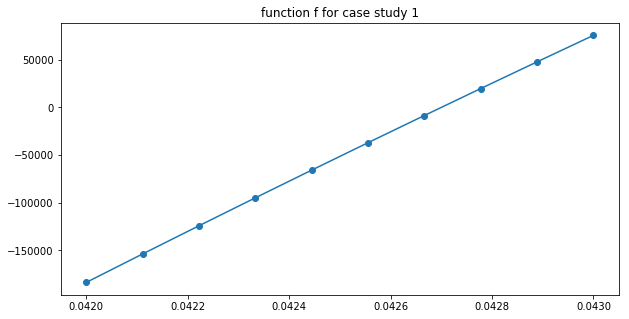

In [36]:
## plot of f
tabV = np.linspace(0.042,0.043,10)
k = 1.3806503e-23
a = 0.401
b = 42.7e-6
N = 1000.0
T = 300.0
p = 3.5e7
y = (p + a * (np.divide(N,tabV))**2) * (tabV-N*b) - k*N*T
fig = plt.figure(figsize=(10, 5))
plt.plot(tabV, y, marker="o")
plt.title("function f for case study 1")
plt.show()

We see that the corresponding function has a unique zero between $V=0.042$ and $V=0.043$. We use these values to initialize the bisection algorithm.

In [26]:
## Function f

def fgaz(V):
    k = 1.3806503e-23
    a = 0.401
    b = 42.7e-6
    N = 1000.0
    T = 300.0
    p = 3.5e7
    return (p + a * (N/V)**2) * (V-N*b) - k*N*T

In [38]:
## Resolution
Va = 0.042
Vb = 0.043
eps=1.0e-12
Kmax = 200
res=Bisection2(fgaz,Va,Vb,eps,Kmax)
kend=res[1]
V = res[0][kend]
print('precision: eps =',eps)
print('number of iterations =',kend)
print('Volume of the gaz =',V)

precision: eps = 1e-12
number of iterations = 30
Volume of the gaz = 0.0426999999997


We obtain that the volume of the gaz is $V=0.0427$.

### Case study 2: Investment found, a solution using bisection

Here, we use the bisection method to solve the case study 3. We recall that we have to find $i$ solution to

$$
f(i) = d \frac{(1+i)^{n_{end}}-1}{i} - S =0 \quad \text{ where } \quad S=30\,000, \quad d=30,\quad \text{and} \quad n_{end} = 120
$$

We use the bisection method to find the corresponding rate of interest with precision $10^{-4}$. First, we plot bellow the corresponding function $f$.

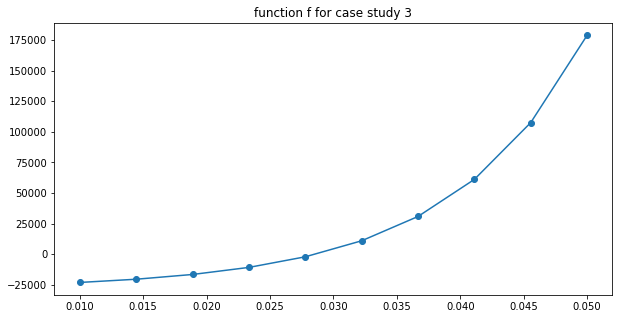

In [37]:
## plot of f
tabi = np.linspace(0.01,0.05,10)
d = 30.0
S = 30000.0
n = 120.0
y = np.divide(d * ((1+tabi)**n-1), tabi) - S
fig = plt.figure(figsize=(10, 5))
plt.plot(tabi, y, marker="o")
plt.title("function f for case study 3")
plt.show()

We see that the corresponding function has a unique zero between $i=0.02$ and $i=0.035$. We use these values to initialize the bisection algorithm.

In [40]:
## Function f

def finterest(i):
    d = 30.0
    S = 30000.0
    n = 120.0
    return d * ((1+i)**n-1)/i - S

In [41]:
## Resolution
a = 0.02
b = 0.035
eps=1.0e-4
Kmax = 20
res=Bisection2(finterest,a,b,eps,Kmax)
kend=res[1]
i = res[0][kend]
print('precision: eps =',eps)
print('number of iterations =',kend)
print('minimal rate of interest =',i)

precision: eps = 0.0001
number of iterations = 8
minimal rate of interest = 0.028642578125


We obtain that the minimal rate of interest to achieve the goal is $2.86$%.

<a id="fixedPoint"></a>
## Fixed point iterations

<table>
        <tr>
            <td><img src="figures/Brouwer.jpeg" alt="Brouwer" style="width: 170px;" /></td>
            <td><img src="figures/Banach.jpg" alt="Banach" style="width: 150px;" /></td>
        </tr>
</table>

>**Luitzen Egbertus Jan Brouwer (1881 – 1966) and Stefan Banach (1892-1945).**
> Brouwer is a Dutch mathematician and philosopher. He proved a lot of results in topology. One of his main theorem is his fixed point theorem (1909). One of its simpler form says that a continuous function from an interval to itself has a fixed point. The proof of the theorem does not provide a method to compute the corresponding fixed point. Among lot of other fixed point results, Brouwers theorem became very famous because of its use in various fields of mathematics or in economics. In 1922, a polish mathematician, Stefan Banach, stated a contraction mapping theorem, proving in some case the existence of a unique fixed point and providing a constructive iterative method to approximate these fixed points. Banach is one of the funders of modern analysis and is often considered as one of the most important mathematicians of the 20-th century.

A fixed point for a function $g$ is a number $x$ such that $g(x)=x$. In this section we consider the problem of finding solutions of fixed point problems. This kind of problem is equivalent to rootfinding problems in the following sense:

- If $x^*$ is a solution to $f(x)=0$, we can find a function $g$ such that $x^*$ is a fixed point of $g$. For example, one can choose $g(x)=f(x)-x$.

- If $x^*$ is a solution to $g(x)=x$, then, $x^*$ is also a solution to $f(x)=0$ where $f(x)=g(x)-x$.

If the two kind of problems are equivalent, the fixed point problem is easier to analyse. In this section, we will focus on such problems in order to understand how to use them the best way for solving rootfinding problems. In the following, functions $f$ will be used for rootfinding problems and $g$ for corresponding fixed point problems.

First, note that, given a function $f$, the choice of $g$ is not unique. For example, any function $g$ of the form $g(x) = G(f(x)) + x$ where $G(0)=0$ is suitable for solving the problem. Let us consider again the problem of computing an approximation of $x^*=2^{1/3}$ as the root of $f(x)=x^3-2$. The five following functions $g$ can be chosen:

- $g_1(x) = x^3-2 + x $
- $\displaystyle g_2(x) = \sqrt{\frac{x^5+x^3-2}{2}}$
- $\displaystyle g_3(x) = -\frac{1}{3} (x^3-2) + x $
- $\displaystyle g_4(x) = -\frac{1}{20} (x^3-2) + x$
- $\displaystyle g_5(x) = \frac{2}{3} x + \frac{2}{3x^2}$

From a numerical point a view, solutions to fixed point problems can be approximated by choosing an initial guess $x_0$ for $x^*$ and generate a sequence by iterating function $g$: 

$$x_{k+1} = g(x_k),\quad\text{for}\quad k\geq 0.$$ 

Indeed, suppose that $g$ is continuous and that the sequence $(x_k)_k$ converges to $x_\infty$, then, passing to the limit in the previous equation gives

$$
x_\infty = g(x_\infty)
$$

and $x_\infty$ is a fixed point of $g$. This leads to the following algorithm:

<div  markdown=1 class="Algo">
**Fixed point iterations method.** Computes a sequence $(x_k)_k$, approximating $x^*$ solution to $g(x^*)=x^*$.


\begin{align}
INPUT:&\quad g, x0\\
DO:&\quad x = x0\\
&\quad \text{While stopping criterion is not achieved do}\\
&\quad\quad\quad x = g(x)\\
&\quad \text{end while}\\
RETURN:&\quad x\\
\end{align}

Now, for a given function $g$, one have to answer the following questions:
- does $g$ has a fixed point ?
- does the sequence generated using fixed point iterations converges ?
-  if the sequence converges, how fast does it converge ?



### Graphical investigation

In order to better understand the behaviour of fixed point iterations, one can try to visualize them on a graph.

First, the fixed point of a function $g$ can be found graphically searching for the intersection between the graph of $g$ and the graph of function $\phi(x)=x$.

Then, suppose $x_0$ is given and place it on the abscissa axis. To place $x_1=g(x_1)$ on the same axis, proceed as follows:
- from $(x_0,0)$, go up to find the point $(x_0, g(x_0)) = (x_0,x_1)$, when crossing the graph of $g$
- from $(x_0,x_1)$ move horizontally to find the point $(x_1,x_1)$, when crossing the graph of $\phi$
- finally, go down towards the abscissa axis to place the point $(x_1,0)$

Then iterate the procedure to vizualize the generated sequence. Four examples are given below:

<table>
        <tr>
            <td><img src="figures/FixedPoint1.png" alt="FixedPoint1" style="width: 300px;" /></td>
            <td><img src="figures/FixedPoint2.png" alt="FixedPoint1" style="width: 300px;" /></td>
        </tr>
        <tr>
            <td><img src="figures/FixedPoint3.png" alt="FixedPoint1" style="width: 300px;" /></td>
            <td><img src="figures/FixedPoint4.png" alt="FixedPoint1" style="width: 300px;" /></td>
        </tr>
</table>

Cases with increasing functions $g$ are given on the left and leads to monotonous sequences. On the contrary, oscillating sequences are generated for non increasing functions $g$ (right). Case (a) and (b) converges, remark that they correspond to cases where $|g'(x)|<1$.

### Convergence analysis

<div  markdown=1 class="Thm">
** Existence of a fixed point. **
Let $g: [a,b]\to \mathbb{R}$. Suppose

- $g\in \cal C [a,b]$
- $g: [a,b] \to [a,b]\quad$ (i.e. $[a,b]$ is stable for $g$)

Then,  $g$ has a fixed point in $[a,b]$:
$$
\exists x^*\in[a,b],\quad g(x^*)=x^*
$$

> **Proof.** 
>If $g(a)=a$ or $g(b)=b$, the proof is finished. If not, the second hypothesis gives $g(a)>a$ and $g(b)<b$. So consider function $h(x) = g(x) - x$. This function is continuous on $[a,b]$ with $h(a)>0$ and $h(b)<0$. Then, the intermediate value theorem (see Appendix) gives the existence of $x^*\in[a,b]$ such that $h(x^*)=0$ and $x^*$ is a fixed point of $g$.

<div  markdown=1 class="Thm">
** Existence of a unique fixed point. **
Let $g: [a,b]\to \mathbb{R}$. Suppose

- $g\in \cal C [a,b]$
- $g: [a,b] \to [a,b]\quad$ (i.e. $[a,b]$ is stable for $g$)
- $g'$ exists on $[a,b]$ and
$$
\exists K<1 \quad \text{such that} \quad \forall x\in[a,b], \quad|g'(x)|\leq K \quad \text{ (i.e. }\,\, g \,\,\text{is a contraction mapping})
$$

Then,  $g$ has a unique fixed point in $[a,b]$:
$$
\exists ! x^*\in[a,b],\quad g(x^*)=x^*
$$

> **Proof.** The existence of a fixed point $x^*$ is given by the previous theorem. The fact that $g$ is a contraction mapping ensures the uniqueness of the fixed point. Indeed, suppose that $x^1$ and $x^2$ are two fixed ponts of $g$ and write the Taylor Lagrange expansion of $g$ around $x^1$ at order 1:
>
>$$
\exists \xi\in I_{x^1,x^2}, \quad \text{such that} \quad  g(x^2)=g(x^1)+(x^2-x^1)\,g'(\xi)
$$
>
>where $I_{x^1,x^2}=[x^1,x^2]$ if $x^1<x^2$ and $I_{x^1,x^2}=[x^2,x^1]$ otherwise. 
>
>Using $g(x^1)=x^1$ and $g(x^2)=x^2$, we obtain
>
>$$
x^2-x^1 = (x^2-x^1)\,g'(\xi)
$$
>
>and using the contraction:
>
>$$
|x^2-x^1|\leq K \,|x^2-x^1|
$$
>
>which gives $x^2=x^1$ since $K<1$.

<div  markdown=1 class="Thm">
** Convergence of fixed point iterations. **
Let $g: [a,b]\to \mathbb{R}$. Consider the sequence $x_{k+1}=g(x_k)$ for $k\geq 0$, $x_0$ being given. Suppose

- $g\in {\cal C} ( [a,b] )$
- $g: [a,b] \to [a,b]\quad$ (i.e. $[a,b]$ is stable for $g$)
- $g'\in {\cal C}^1 ([a,b])$ and
$$
\exists K<1 \quad \text{such that} \quad \forall x\in[a,b], \quad|g'(x)|\leq K
$$

Then,  $g$ has a unique fixed point $x^*$ in $[a,b]$ and the sequence $(x_k)_k$ converges to $x^*$ for any choice of $x_0\in [a,b]$. Moreover we have

$$
\lim_{k\to\infty} \frac{x_{k+1}-x^*}{x_k-x^*} = g'(x^*)
$$

so that the sequence converges at least with order 1.

> **Proof.** The existence and uniqueness of the fixed point is given by the previous theorem. The convergence analysis is given again using a Taylot expansion:
>
>$$
\forall k\geq 0, \quad \exists \xi_k\in I_{x^*,x_{k}}, \quad \text{such that} \quad  g(x_k)=g(x_*)+(x_k-x^*)\,g'(\xi_k).
$$
>
>This, together with $g(x_k)=x_{k+1}$ and $g(x^*)=x^*$ gives
>
>$$
\forall k\geq 0, \quad \exists \xi_k\in I_{x^*,x_{k}}, \quad \text{such that} \quad  x_{k+1}-x^*=(x_k-x^*)\,g'(\xi_k)
$$
>
> From this we obtain that 
>
>$$
|x_{k+1}-x^*|\leq K |x_k-x^*| \leq K^{k+1}|x_0-x^*| \rightarrow 0 \quad \text{ when } k\to \infty
$$
>
>and the sequence converges to $x^*$.
>Moreover, since $x_k$ converges to $x^*$, we have that $\xi_k$ converges to $x^*$ and from the continuity of $g'$ we obtain $g'(\xi_k)\to g'(x^*)$ when $k$ goes to infinity. Then, we have
>
>$$
\frac{x_{k+1}-x^*}{x_k-x^*} = g'(\xi_k) \rightarrow g'(x^*) \text{ when } k\to \infty
$$
>
>which ends the proof.

<div  markdown=1 class="Rmk">
Note that these theorems provide sufficient but not necessary condition for convergence. 

- If $|g'(x^*)|>1$, if $x_k$ is sufficiently close to $x^*$ we have that $g'(\xi_k)>1$ and then $|x_{k+1}-x^*| > |x_k-x^*| $. The sequence cannot converge.
- If $|g'(x^*)|=1$, no conclusion can be stated: the sequence can converge or not, depending on the cases. Two examples are given below, for both of them $g'(x^*)=1$ but in the first case, the fixed point iterations converge, which is not the case for the second example.

In [12]:
# phi1(x) = x-x^3. Fixed point x^*=0, g'(x^*)=1.
# The fixed point iterations converge to x^* (very slowly)

def phi1(x):
    return x - x**3

x0 = 0.1 
K = 20
x=FixedPoint(phi1,x0,K)
print('x =',x)

x = [ 0.1         0.099       0.0980297   0.09708765  0.0961725   0.09528299
  0.09441793  0.09357622  0.09275682  0.09195875  0.09118111  0.09042303
  0.0896837   0.08896236  0.08825829  0.0875708   0.08689925  0.08624303
  0.08560157  0.08497431  0.08436074]


In [14]:
# phi1(x) = x+x^3. Fixed point x^*=0, g'(x^*)=1.
# The fixed point iterations do not converge

def phi2(x):
    return x + x**3

x0 = 0.1
K = 20
x=FixedPoint(phi2,x0,K)
print('x =',x)

x = [ 0.1         0.101       0.1020303   0.10309246  0.10418813  0.10531911
  0.10648732  0.10769484  0.1089439   0.11023693  0.11157655  0.1129656
  0.11440718  0.11590466  0.11746171  0.11908236  0.12077102  0.12253254
  0.12437227  0.12629612  0.12831063]


<div  markdown=1 class="Rmk">
The fixed point theorem ensures the convergence of the sequence for any choice of $x_0\in [a,b]$ and then presents a global convergence result. 

However, in practice, even if $|g'(x^*)|<1$, finding a stable interval on which $g$ is a contracting mapping is not so easy. 

In fact, one can prove that, if $g$ is continuous and differentiable and if $|g'(x^*)|<1$, such an interval exixts: more precisely, there exists a neighbourhood $I$ of $x^*$ such that, for any $x_0\in I$, the fixed point iterations converge to $x^*$. This local convergence result is stated in the following theorem:

<div  markdown=1 class="Thm"> ** Local convergence for fixed point iterations.** Let $g: [a,b]\to \mathbb{R}$. Consider the sequence $x_{k+1}=g(x_k)$ for $k\geq 0$, $x_0$ being given. Suppose 

- $x^*$ is a fixed point of $g$
- $g\in {\cal C} ( [a,b] )$
- $g$ is differentiable on $[a,b]$ and $|g'(x^*)|<1$

Then, there exists a neighbourhood $I$ of $x^*$ such that, for any $x_0\in I$, the fixed point iterations converge to $x^*$. 


From the previous estimations, we remark that the smaller is the constant $|g'(x^*)|$, the faster is the convergence. In the next theorem, we prove (among others) that for $|g'(x^*)|=0$, the convergence is quadratic.

<div  markdown=1 class="Thm">
** "Better than linear" speed of convergence of fixed point iterations. **
Let $g: [a,b]\to \mathbb{R}$ and and suppose that the hypothesis of the previous theorem are fulfilled. If 

- $g\in {\cal C^{p+1}} ( I )$ where $I$ is a neighbourhood of $x^*$ and $n$ is an integer $n\geq 0$
- $g^{(i)}(x^*)=0\quad$ for $\quad 0\leq i \leq p$
- $g^{(p+1)}(x^*)\neq 0$ 

Then, the fixed point iteration method with function $g$ has order $p+1$ and 

$$
\lim_{k\to\infty} \frac{x_{k+1}-x^*}{(\,x_k-x^*\,)\,^{p+1}} = \frac{g^{(p+1)}(x^*)}{(p+1)!}.
$$

This proves that the sequence converges at least with order $p+1$.

> **Proof.** Again, we expand $g$ around $x^*$ at order $p+1$:
>
>$$ 
\forall k\geq 0, \quad \exists \xi_k\in I_{x^*,x^{k}}, \quad \text{such that} \quad  g(x_k)=g(x^*)+\frac{(x_k-x^*)}{(p+1)!}\,g^{(p+1)}(\xi_k)
$$
>
>and we obtain
>
>$$
\frac{x_{k+1}-x^*}{x_k-x^*} = \frac{g^{(p+1)}(\xi_k)}{(p+1)!} \rightarrow \frac{g^{(p+1)}(x^*)}{(p+1)!}  \text{ when } k\to \infty
$$



### Numerical tests

Let us consider again the 5 iteration functions proposed at the begining of the section to compute $x^*=2^{1/3}$ in light of these results. To do so, we first write the functions computing the fixed point iterations for a given $g$:

In [47]:
xstar = 2**(1.0/3)

In [48]:
## Fixed point algorithm for function g
## input : g = name of the function
##         x0 = initialization
##         K = number of iterations
## output : x = sequence generated using the fixed point iteration for g (x[k]=x_k)
def FixedPoint(g,x0,K):
    # create vector x
    x = np.zeros(K+1)
    k = 0
    x[0] = x0  
    # computation of x_k
    while k < K:
        x[k+1] = g(x[k])
        k = k+1
    return x

- $g_1(x) = x^3-2 + x $
    - $g'(x^*)>1$: the fixed point iterations do not converge, whatever the value of $x_0$ is.

In [12]:
def g1(x):
    return x**3 - 2 + x

x0 = xstar + 0.001 
#x0 = xstar - 0.001
K = 10
x = FixedPoint(g1,x0,K)
print('x =',x)

x = [  1.26092105e+000   1.26568703e+000   1.29327168e+000   1.45633533e+000
   2.54509524e+000   1.70309746e+001   4.95493491e+003   1.21650495e+011
   1.80028656e+033   5.83478577e+099   1.98643677e+299]


- $\displaystyle g_2(x) = \sqrt{\frac{x^5+x^3-2}{2}}$
    - $g_2$ is defined on $I_0=[1,+\infty[$. The unique fixed point in $I_0$ is $x^*$ with $g_2'(x^*)>1$ so that the sequence cannot converge to $x^*$. Moreover, $I_0$ is not stable for $g_2$ and therefore, a sequence with $x_0\in I_0$ can be undefined for some $k\geq 0$.

In [13]:
def g2(x):
    return np.sqrt( (x**5 + x**3 - 2) / 2 )

x0 = xstar - 0.001
#x0 = xstar + 0.001
K = 10
x = FixedPoint(g2,x0,K)
print('x =',x)

x = [ 1.25892105  1.25647611  1.24805342  1.21903329  1.11882798  0.75949395
         nan         nan         nan         nan         nan]


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


- $\displaystyle g_3(x) = -\frac{1}{3} (x^3-2) + x $
    - $-1<g_3'(x^*)|<0$. The fixed point theorems prove that the sequence it converges to $x^*$ with order 1, for $x_0$ sufficiently close to $x^*$. 
    - Since the derivative is negative at point $x^*$, the sequence oscilates around $x^*$

In [49]:
def g3(x):
    return - (x**3-2)/3 + x

x0 = xstar + 1
#x0 = xstar + 2
K = 10
x = FixedPoint(g3,x0,K)
print('xstar =',xstar)
print('x =',x)
err3 = abs(x-xstar)
print('error =',err3)

xstar = 1.2599210498948732
x = [ 2.25992105 -0.92073439  0.00611703  0.67278362  1.23794119  1.2722269
  1.25250117  1.26421027  1.25737835  1.26140649  1.25904572]
error = [  1.00000000e+00   2.18065544e+00   1.25380402e+00   5.87137431e-01
   2.19798632e-02   1.23058484e-02   7.41988420e-03   4.28921940e-03
   2.54269757e-03   1.48544292e-03   8.75331896e-04]


- $\displaystyle g_4(x) = -\frac{1}{20} (x^3-2) + x$
    - $0<g_4'(x^*)<1$. The fixed point theorems prove that the sequence converges to $x^*$ with order 1, for $x_0$ sufficiently close to $x^*$. 
    - Since the derivative is positive at point $x^*$, the sequence is monotone
    - $g'(x^*)$ is close to 1 so the convergence is very slow

In [83]:
def g4(x):
    return - (x**3-2)/20 + x

x0 = xstar + 1
#x0 = sqrt(2) + 4
K = 10
x = FixedPoint(g4,x0,K)
print('xstar =',xstar)
print('x =',x)
err4 = abs(x-xstar)
print('error =',err4)

xstar = 1.2599210498948732
x = [ 2.25992105  1.78282273  1.59949147  1.49488669  1.42785655  1.38230269
  1.3502402   1.32715578  1.31027699  1.29780112  1.28850759]
error = [ 1.          0.52290168  0.33957042  0.23496564  0.1679355   0.12238164
  0.09031915  0.06723473  0.05035594  0.03788007  0.02858654]


- $\displaystyle g_5(x) = \frac{2}{3} x + \frac{2}{3x^2}$
    - $g'(x^*)=0$. The fixed point theorems prove that the sequence converges to $x^*$ with order 2 if $x_0$ is sufficiently close to $x^*$
    - More precisely, the study of function $g_5$ shows that $I=]\left(\frac{4}{5} \right)^{1/3},+\infty[$ is stable and that, for all $x\in I$, $0<g'(x)<2/3<1$. Then, from the fixed point theorems, we obtain that the sequence converges (with order 2) for any $x_0\in I$.
    - if $x_0\in]0,\left(\frac{4}{5} \right)^{1/3}]$ we have that $x_1\in I$ and from the previous point the sequence converges. 
    - We conclude that, whatever is $x_0>0$, the sequence converges with order 2 to $x^*$.

In [50]:
def g5(x):
    return 2*x/3 + 2/(3*x**2)

x0 = xstar + 1
K = 5
x = FixedPoint(g5,x0,K)
print('xstar =',xstar)
print('x =',x)
err5 = abs(x-xstar)
print('error =',err5)

xstar = 1.2599210498948732
x = [ 2.25992105  1.6371476   1.34016454  1.2646298   1.25993856  1.25992105]
error = [  1.00000000e+00   3.77226550e-01   8.02434896e-02   4.70875296e-03
   1.75109233e-05   2.43369769e-10]


- To finish, let us compare graphically the convergence for iterations of $g_1$, $g_3$ and $g_4$. The first two one are of order 1 and the last one of order 2. 

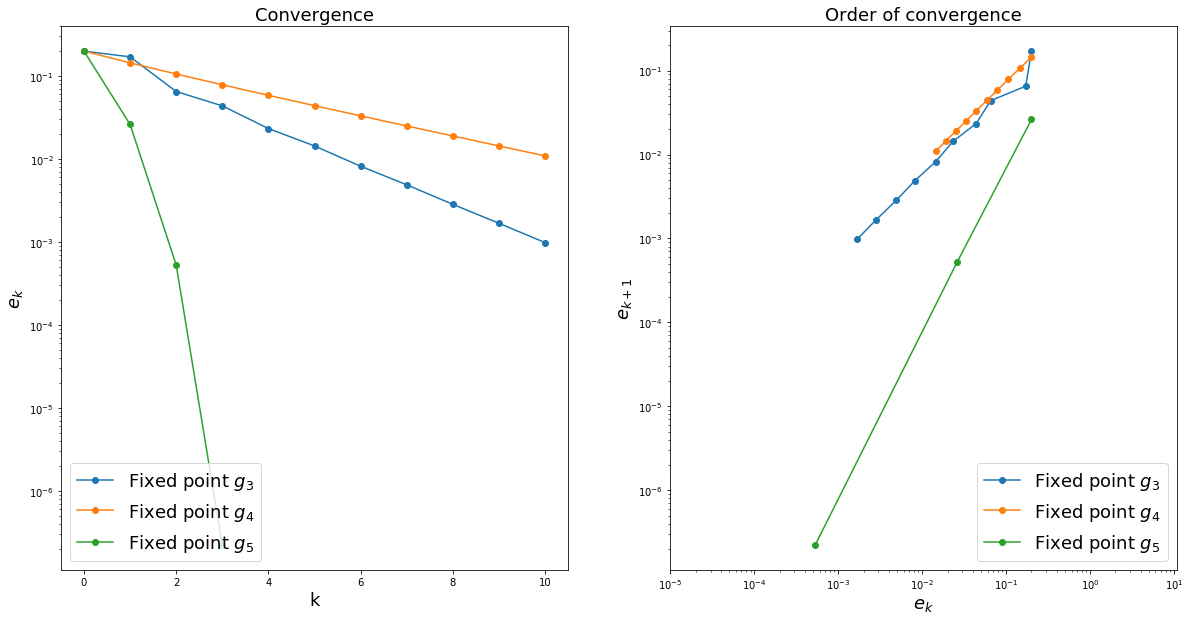

In [92]:
x0 = xstar + 0.2

# g3 and g4
K=10
tabk1 = np.arange(0,K+1,1)
x = FixedPoint(g3,x0,K)
err3 = abs(x-xstar)
x=FixedPoint(g4,x0,K)
err4 = abs(x-xstar)

# g5 (if K is too big, the error reaches 0 and log-log plots fail)
K=3
tabk2 = np.arange(0,K+1,1)
x = FixedPoint(g5,x0,K)
err5 = abs(x-xstar)

fig = plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.plot(tabk1, err3, marker="o", label='Fixed point $g_3$')
plt.plot(tabk1, err4, marker="o", label='Fixed point $g_4$')
plt.plot(tabk2, err5, marker="o", label='Fixed point $g_5$')
plt.legend(loc='lower left', fontsize=18)
plt.xlabel('k', fontsize=18)
plt.ylabel('$e_{k}$', fontsize=18)
plt.yscale('log')        # log scale for the error
plt.title('Convergence', fontsize=18)

plt.subplot(122)
plt.loglog(err3[:-1:], err3[1:], marker="o", label='Fixed point $g_3$') #log-log scale
plt.loglog(err4[:-1:], err4[1:], marker="o", label='Fixed point $g_4$') #log-log scale
plt.loglog(err5[:-1:], err5[1:], marker="o", label='Fixed point $g_5$') #log-log scale
plt.legend(loc='lower right', fontsize=18)
plt.axis('equal')
plt.xlabel('$e_k$', fontsize=18)
plt.ylabel('$e_{k+1}$', fontsize=18)
plt.title('Order of convergence', fontsize=18)

plt.show()

### Stopping criterion

In general, fixed point iterations are terminated using criterion 1: for $\epsilon$ given, terminate when

$$
|x_{k+1}-x_k|<\epsilon
$$

This is justified by the fact that, using again a taylor expansion, we have:

$$
\exists \xi_k\in I_{x^*,x_{k}}, \quad \text{such that} \quad  g(x_{k})=g(x^*)+(x_{k}-x^*)
\,g'(\xi_k)
$$

From this, together with $g(x_k)=x_{k+1}$ and $g(x^*)=x^*$ we get

$$
x^*-x_k = (x^*-x_{k+1}) + (x_{k+1}-x_k) = - (x_{k}-x^*)g'(\xi_k) + (x_{k+1}-x_k)
$$

and finally we obtain:

$$
x^*-x_{k} = \frac{1}{1-g'(\xi_k)} (x_{k+1}-x_k)
$$

Consequently, if $g'(x^*)=0$ (which is the case for methods of order 2), $x_{k+1}-x_k$ is a good estimator for the error. In the case $g'(x^*)$ is close to 1, it is not safisfactory... 

Another possible test could be 

$$|f(x_k)|<\epsilon.$$ 

In that case, as for any rootfinding method, the test will be satisfactory if $f'(x^*)\approx 1$, not reliable if $f'(x^*)<<1$ and too restrictive if $f'(x^*)>>1$.

<a id="Newton"></a>
## The Newton-Raphson method

<img src="figures/Newton.jpg" alt="Brouwer" style="width: 170px;" />

>**Isaac Newton (1643 – 1727).**
> English mathematician, astronomer, theologian, author and physicist, Isaac Newton is known as one of the most important scientists. He made breaking contributions to classical mechanics, optic and also contributed to infinitesimal calculus. In particular, he described in an unpulished work in 1671 a method to find zeros of polynomials now known as the Newton-Raphson method. Indeed, it was first published (with a reference to Newton) by another english mathematician, Joseph Raphson in 1690. Newton finally published his analysis in 1736. Both of them focused on zeros of polynomial functions but the basis of the general method was already present in their works.

The Newton-Raphson (or simply Newton's) method is one of the most powerfull and well-known method to solve rootfinding problems $f(x)=0$. The simplest way to describe it is to see it as a graphical procedure: $x_{k+1}$ is computed as the intersection with the $x$-axis of the tangent line to the graph of $f$ at point $(x_k,f(x_k))$.

<img src="figures/NewtonFig.png" alt="Algo Newton" style="width: 600px;" />

So that the Newton's method starts with an initial approximation $x_0$ and generates the sequence of approximations $(x_k)_k$ defined by

$$
x_{k+1} = x_k - \frac{f(x_{k})}{f'(x_k)},
$$

which leads to the following algoritm:

<div  markdown=1 class="Algo">
**Newton-Raphson method.** Computes a sequence $(x_k)_k$, approximating $x^*$ solution to $f(x^*)=0$.


\begin{align}
INPUT:&\quad f, x0\\
DO:&\quad x = x0\\
&\quad \text{While stopping criterion is not achieved do}\\
&\quad\quad\quad x = x - \frac{f(x)}{f'(x)}\\
&\quad \text{end while}\\
RETURN:&\quad x\\
\end{align}

Interpreting Newton's method as a fixed point iteration method, one can prove the following **local** convergence theorem:

<div  markdown=1 class="Thm"> ** Local convergence of Newton's method. ** Let $f: [a,b]\to \mathbb{R}$. Consider the sequence $(x_k)_k$ generated by Newton's method for $k\geq 0$, $x_0$ being given. Suppose 

- $x^*$ is a root of $f$ in $[a,b]$
- $f\in {\cal C^2} ( [a,b] )$
- $f'(x^*)\neq 0\quad$ ($x^*$ is a simple root of $f$)

Then, there exists a neighbourhood $I$ of $x^*$ such that, for any $x_0\in I$, the Newton's iterations converge to $x^*$ and the convergence is of order 2.

> **Proof.** Let us consider function $\displaystyle g(x)=x + \frac{f(x)}{f'(x)}$, such that $x_{k+1}=g(x_k)$. Using continuity of $f'$, $g$ is defined in a neighbourhood $I$ of $x^*$. Moreover $g\in {\cal C}(I)$ and we have
>
>$$
g'(x^*) = \frac{f(x^*)\,f''(x^*)}{(f'(x^*))^2} = 0
$$
>
>so that the fixed point local convergence theorem provides a neighbourhood $\bar I\subset I$ of $x^*$ for which the sequence converges towards $x^*$ if $x_0\in \bar I$.
>
>If we suppose that $f\in {\cal C}^3(I)$, one can prove the quadratic convergence using the corresponding result of the fixed point iterations of $g\in {\cal C}^2(I)$. In fact, the result is still true for $f\in {\cal C}^2(I)$. Indeed, a Taylor expansion of $f$ gives
>
>$$
0 = f(x^*) = f(x_k) + f'(x_k) (x^*-x_k) + \frac{f''(\xi_k)}{2}(x^*-x_k)^2 \quad \text{with} \quad \xi_k\in I_{x^*,x_k}
$$
>
>and then using that $\xi_k\to x^*$ we have
>
>$$
\frac{x_{k+1}-x^*}{(x_k-x^*)^2} = \frac{f''(\xi_k)}{2 f'(x^*)} \rightarrow \frac{f''(x^*)}{2 f'(x^*)}  \text{ when } k\to \infty
$$
>
>which proves the quadratic convergence.

<div  markdown=1 class="Rmk">
In the previous fixed-point examples to compute $x^*=2^{1/3}$, the iteration function $g_5$ was precisely the Newton's iteration function.

<div  markdown=1 class="Rmk">
One of the main drawback of Newton's method is that the convergence result is a local convergence result. As a consequence, the sequence has to be carrefully initialized with an approximation $x_0$ close to $x^*$, which is not so easy to do in practice. A method to do that is to run a bisection method to compute a rough approximation of $x^*$ and then to initialize Newton methods with this approximation in order to make it much more precise.

<div  markdown=1 class="Rmk"> Another main difficulty with Newton's method is the case where $f'(x^*)$ is close to (or equal to) zero. Suppose that it is the case but that the sequence is still defined for any $x\geq 0$ (i.e. $f'(x_k)\neq 0$ for all $k\geq 0$). Then

- if $f'(x^*)<<1$ but $f'(x^*)\neq 0$. The convergence is still quadratic but is very deteriorated due to the big constant $\displaystyle\frac{f''(x^*)}{2\,f'(x^*)}$

- if $f'(x^*)=0$, $x^*$ is a multiple root and we do not have anymore $g'(x^*)=0$. One can prove that $\displaystyle g'(x_k)=1-\frac{1}{m}$ where $m$ is the multiplicity of the root. From $|g'(x^*)|<1$ we obtain the local convergence of the algorithm with order 1. The quadratic convergence can be recovered using fixed point interations with $\displaystyle g^{new}(x)=x-m\frac{f(x)}{f'(x)}$.

We are now going to use Newton's method to solve case study 2 and 3. To do so, we first implement the method and test it to approximate $x^*=2^{1/3}$, the unique solution in $\mathbb R$ to $f(x) = x^3-2=0$. We shall recover the results given using the fixed point iteration with function $g_5$. In this version, the stopping criterion is: stop if the requested number of iteration is achieved, if the zero was found or if $|x_{k+1}-x_k|<\epsilon$ with $\epsilon$ given. 

In [79]:
## Newton's algorithm for function f
## input : f = name of the function
##         df = name of the derivative of function f
##         x0 = initial guess for x^*
##         eps = precision for stopping criterion
##         K = maximal number of iterations
## output : x = sequence approximating the zero of f

def Newton(f,df,x0,eps,K):
    # create vector x
    x = np.zeros(K+1)
    x[0] = x0
    x[1] = x[0] - f(x[0])/df(x[0])
    k = 1
    # computation of x_k
    # stops if the root is found or |x_{k+1}-x_k|<eps or k>Kmax
    while f(x[k]) != 0 and k < K and abs(x[k]-x[k-1])>eps:
        k = k+1
        x[k] = x[k-1] - f(x[k-1])/df(x[k-1])
    return (x, k)

In [80]:
## Function f: x -> x^3 -2
## and its derivative df: x-> 3 * x^2

def ftest(x):
    return x**3 - 2

def dftest(x):
    return 3 * x**2

In [87]:
## Test of the newton algorithm for f(x) = x^2 -2
## comparison with the results given by the fixed point iterations for function g5 (shall be the same)
def g5(x):
    return 2*x/3 + 2/(3*x**2)

x0 = xstar + 1
K = 10
x = FixedPoint(g5,x0,K)
eps = 0.0001
resNewton = Newton(ftest,dftest,x0,eps,K)
kend = resNewton[1]
xNewton = resNewton[0][:kend+1]

print('xstar =',xstar)

print('\n**** Fixed point with g5 ****')
print('x =',x)

print('\n**** Newton ****')
print('eps =',eps)
print('Number of iterations:',kend)
print('xNewton =',xNewton)
print('errNewton =',abs(xNewton[kend]-xstar))


xstar = 1.2599210498948732

**** Fixed point with g5 ****
x = [ 2.25992105  1.6371476   1.34016454  1.2646298   1.25993856  1.25992105
  1.25992105  1.25992105  1.25992105  1.25992105  1.25992105]

**** Newton ****
eps = 0.0001
Number of iterations: 5
xNewton = [ 2.25992105  1.6371476   1.34016454  1.2646298   1.25993856  1.25992105]
errNewton = 2.43369768782e-10


Newton's algorithm stops after 5 iterations and we can check that the computed sequence is the same that the one provided using the fixed point algorithm for function $g_5$. Newton's algorithm provides a result with precision $10^{-10}$ while the stopping criterion is $|x_{k+1}-x_k|<10^{-4}$. In the following figure, we compare the real error and the stopping criterion at each iteration.

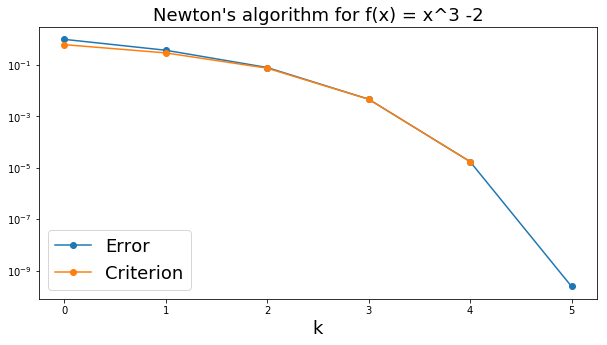

In [93]:
err = abs(xNewton-xstar)
criterion = abs(xNewton[1:]-xNewton[:-1:])

fig = plt.figure(figsize=(10, 5))
tabk=np.arange(0,kend+1,1)
plt.plot(tabk, err, marker="o", label='Error')
plt.plot(tabk[0:kend], criterion, marker="o", label='Criterion')
plt.legend(loc='lower left', fontsize=18)
plt.xlabel('k', fontsize=18)
plt.yscale('log')        # log scale for the error
plt.title('Newton\'s algorithm for f(x) = x^3 -2', fontsize=18)
plt.show()

As expected, $|x^{k+1}-x^k|$ is a good estimator for the error $|x^*-x^k|$ (case of a fixed point of order 2). However, the error can be higher than the stopping criterion... Note that, since the computation of the estimator necessitates the knowledge of the value of $x^{k+1}$, the algorithm computes one more step than necessary and that's the reason why the precision is better than expected. 

### Case study 2: Investment found, a solution using Newton's algorithm

We use Newton's method to solve the case study 3 with tolerance $10^{-4}$. We recall that we have to find $i$ solution to

$$
f(i) = d \frac{(1+i)^{n_{end}}-1}{i} - S =0 \quad \text{ where } \quad S=30\,000, \quad d=30,\quad \text{and} \quad n_{end} = 120
$$

We compare to the results obtained using the bisection algorithm.

In [94]:
## derivative of function finterest

def dfinterest(i):
    d = 30.0
    S = 30000.0
    n = 120.0
    return d * ((1+i)**(n-1) * ((n-1)*i-1) + 1)/(i**2)

In [110]:
## Resolution
a = 0.02
b = 0.035
eps=1.0e-4
Kmax = 10

res=Bisection2(finterest,a,b,eps,Kmax)
kend=res[1]
i = res[0][0:kend+1]
print('**** Bisection ****')
print('precision: eps =',eps)
print('number of iterations =',kend)
print('minimal rate of interest  =',i[-1])

resNewton = Newton(finterest,dfinterest,b,eps,Kmax)
kendNewton=resNewton[1]
iNewton = resNewton[0][0:kendNewton+1]
print('\n**** Newton ****')
print('precision: eps =',eps)
print('number of iterations =',kendNewton)
print('minimal rate of interest  =',iNewton[-1])
print('Newton\'s iterations =',iNewton)

**** Bisection ****
precision: eps = 0.0001
number of iterations = 8
minimal rate of interest  = 0.028642578125

**** Newton ****
precision: eps = 0.0001
number of iterations = 4
minimal rate of interest  = 0.0286474746555
Newton's iterations = [ 0.035       0.03021858  0.02875713  0.02864803  0.02864747]


Here, the bisection method is initialised by the interval $[a,b]$ and Newton's method by the initial guess $x_0=b$. For a stopping criterion based on $\epsilon=10^{-4}$, the bissection algorithm executes 8 iterations while Newton's algorithm executes 4 iterations. Note that, since the criterion at step $k+1$ for Newton's algorithm is a bound for the approximation $x_{k}$, the third iteration of Newton's method already provided a result with tolerance $10^{-4}$.

### Case study 3: A first population model, a solution using Newton's algorithm

We want to find an approximation for the natural growth rate $\lambda$ in France with tolerance $10^{-4}$. To do so, we have to solve the following non-linear equation for $\lambda$ (we know that $\lambda \neq 0$ since the population increases more than the migratory balance):

$$
f(\lambda) = N(2017) - N(2016)\exp(\lambda) - \frac{r}{\lambda}(\exp(\lambda)-1)
$$

where N(2016)=66 695 000, N(2017)=66 954 000 and r=67 000.



In [120]:
## definition of the function fpop

def fpop(l):
    N0 = 66695000.0
    N1 = 66954000.0
    r = 67000.0
    return N1 - N0*exp(l) - r*(exp(l)-1)/l

In [121]:
## definition of the derivative of fpop
def dfpop(l):
    N0 = 66695000.0
    N1 = 66954000.0
    r = 67000.0
    expl = exp(l)
    return - N0*expl + r*(expl-1)/(l**2) - r*expl/l

In [129]:
K = 10
eps = 1e-4
x0 = 1
resNewton = Newton(fpop,dfpop,x0,eps,K)
kend = resNewton[1]
x = resNewton[0][:kend+1]
print('precision: eps =',eps)
print('number of iterations =',kend)
print('minimal rate of interest  =',x[kend])

precision: eps = 0.0001
number of iterations = 5
minimal rate of interest  = 0.0028732003719


Using this model, the natural rate increase in France is $\lambda = 0.0029$. Using that, and assuming that the migratory balance will be the same in 2017, one can compute an estimation of the population in France at the beginning of year 2018:
$$
N(2018) = N(2017) \exp (\lambda \, t) + \frac{r}{\lambda}(\exp(\lambda t)-1)
$$

In [125]:
N1 = 66954000.0
r = 67000.0
l = x[kend]
N2 = N1*exp(l) + r*(exp(l)-1)/l
print('Estimated population at the beginning of 2018 in France =',N2)

Estimated population at the beginning of 2018 in France = 67213745.2291


## Appendix

### Intermediate value thm


<div  markdown=1 class="Thm">
** Intermediate value Theorem**

Suppose $f: [a,b]\mapsto \mathbb{R}$ is continuous on $[a,b]$. Define $m=\min\{f(a),f(b) \}$ and $M=\max\{f(a),f(b) \}$. Then,

$$
\forall y \in ]m,M[,\quad \exists x\in]a,b[,\quad \text{such that}\quad f(x)=y.
$$

As a consequence, if a continuous function has values of opposite signs in an interval, it has a root in this interval.

The following figure provides an example of choice for $x$ garanteed by this theorem. In this case, the choice is not unique.

<img src="figures/ThmValInt.png" alt="Intermediate Value Thm" style="width: 600px;" />

In [3]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()